<a href="https://colab.research.google.com/github/juniperlovato/DiverseMisinformationPaper/blob/main/Bootstrapping_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook generates bootstrap samples from two confusions matrices and compares their MCC scores. We use it to test the significance of biases in results of Lovato et al. (2022).

##Imports and installs

In [1]:
import numpy as np
import scipy
from scipy.stats import spearmanr
from scipy.stats import ttest_ind

In [2]:
#for latex in matpliotlib
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apach

##Functions for bootstraping and difference of mean test

In [3]:
#function that generates a bootstraped sampled of correlation coefficients
#input: confusion matrix as 4 parameters
#output an array of 10,000 correlation coefficient
def generate_corrcoeff(TP,FN,FP,TN):
  norm = TP+FN+FP+TN
  corrcoeff = []
  for repetition in range(10000):
    a = []
    b = []
    for data in range(norm):
      rn = np.random.randint(norm)
      if rn<TP:
        a.append(1)
        b.append(1)
      elif rn<TP+FN:
        a.append(0)
        b.append(1)
      elif rn<TP+FN+FP:
        a.append(1)
        b.append(0)
      else:
        a.append(0)
        b.append(0)
    corrcoeff.append(scipy.stats.spearmanr(a,b)[0])
  return corrcoeff

In [4]:
from matplotlib import pyplot

def visualize_bootstrap(array1,label1,array2,label2,label):
  pyplot.rcParams['text.usetex']       = True
  pyplot.rcParams['font.size']         = 14
  pyplot.rcParams['font.family']       = 'serif'
  pyplot.rcParams['font.serif']        = 'Computer Modern Roman'
  pyplot.rcParams['xtick.major.width'] = 2
  pyplot.rcParams['xtick.major.size']  = 8
  pyplot.rcParams['ytick.major.width'] = 2
  pyplot.rcParams['ytick.major.size']  = 8

  bins = np.linspace(-1, 1, 100)

  pyplot.hist(array1, bins, alpha=0.5, label=label1)
  pyplot.hist(array2, bins, alpha=0.5, label=label2)
  pyplot.legend(loc='upper right')
  pyplot.xlabel(r'MCC')
  pyplot.ylabel(r'Bootstrap counts')
  pyplot.text(-0.9,1400,label)
  pyplot.ylim(0,1500)
  pyplot.xlim(-1,1)
  pyplot.show()

In [5]:
def find_confidence(array):
  array_has_nan = np.isnan(np.sum(array))
  if array_has_nan:
    return(np.sum(array))
  for quant in np.arange(0.000,1.0,0.001):
    res = np.quantile(array, quant)
    if res>0:
      return(quant - 0.001)
      break
  return(quant)

def plot_difference_of_MCC(array1,array2,label1,label2):

  #subtract correlation coefficients from one another
  array = np.subtract(array1,array2)

  #calculate where 0 falls in the resulting quantiles
  confidence = find_confidence(array)
  #express confidence as a "probability" that the null can be rejected
  if confidence<0.5:
    confidence = 1-confidence

  #fix confidence format
  conf_str = f'{confidence:.2f}'

  #Visualize this test
  pyplot.rcParams['text.usetex']       = True
  pyplot.rcParams['font.size']         = 14
  pyplot.rcParams['font.family']       = 'serif'
  pyplot.rcParams['font.serif']        = 'Computer Modern Roman'
  pyplot.rcParams['xtick.major.width'] = 2
  pyplot.rcParams['xtick.major.size']  = 8
  pyplot.rcParams['ytick.major.width'] = 2
  pyplot.rcParams['ytick.major.size']  = 8
  bins = np.linspace(-1, 1, 100)
  pyplot.hist(array, bins, alpha=0.5, label=label1)
  pyplot.vlines(0, 0, 1500, colors='k', linestyles='--')
  pyplot.text(-0.9,1400,label2)
  pyplot.ylim(0,1500)
  pyplot.xlim(-1,1)
  pyplot.legend(loc='upper right')
  pyplot.xlabel(r'Difference of MCC')
  pyplot.ylabel(r'Bootstrap counts')
  pyplot.text(0.26,1150,'Confidence = %s'%(conf_str))
  pyplot.show()

Generate and compare bootstrap samples for two *independent* categories to be compared

##Bias per Age

Ttest_indResult(statistic=29.976846069783733, pvalue=4.097629331081337e-193)


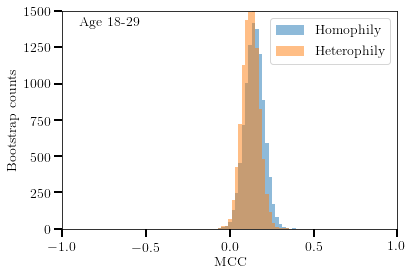

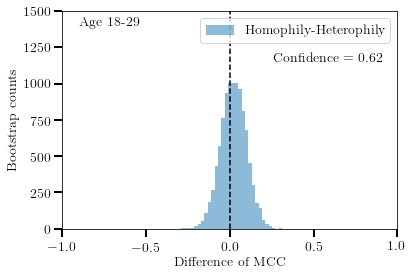

In [7]:
# Age1829_Heterophily	"[[152 49]
#   [117 65]]"
# Age1829_Homophily	"[[117 28]
#   [107 51]]"

#Argument key: TP,FN,FP,TN
bootstrap_homo1829 = generate_corrcoeff(117,28,107,51)
bootstrap_hetero1829 = generate_corrcoeff(152,49,117,65)

result_bias_1829 = ttest_ind(bootstrap_homo1829,bootstrap_hetero1829,equal_var=False)
print(result_bias_1829)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homo1829,'Homophily',bootstrap_hetero1829,'Heterophily', 'Age 18-29')
plot_difference_of_MCC(bootstrap_homo1829,bootstrap_hetero1829,'Homophily-Heterophily', 'Age 18-29')

Ttest_indResult(statistic=-66.05417164345349, pvalue=0.0)


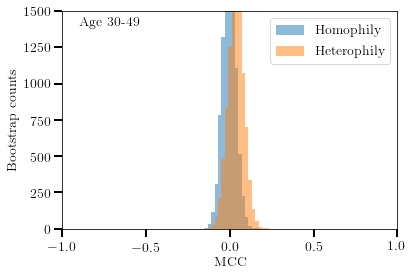

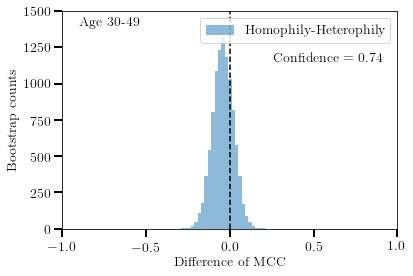

In [8]:
# Age3049_Heterophily	"[[178 54]
#   [173 62]]"
# Age304_Homophily	"[[235 64]
#   [243 65]]"

#Argument key: TP,FN,FP,TN
bootstrap_homo3049 = generate_corrcoeff(235,64,243,65)
bootstrap_hetero3049 = generate_corrcoeff(178,54,173,62)

result_bias_3049 = ttest_ind(bootstrap_homo3049,bootstrap_hetero3049,equal_var=False)
print(result_bias_3049)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homo3049,'Homophily',bootstrap_hetero3049,'Heterophily', 'Age 30-49')
plot_difference_of_MCC(bootstrap_homo3049,bootstrap_hetero3049,'Homophily-Heterophily', 'Age 30-49')

Ttest_indResult(statistic=107.82453150191145, pvalue=0.0)


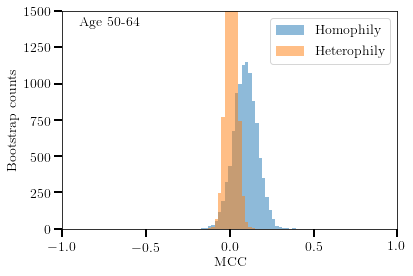

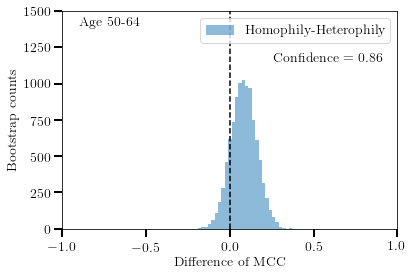

In [9]:
# Age5064_Heterophily	"[[375 121]
#   [344 116]]"
# Age5064_Homophily	"[[85 24]
#   [72 31]]"

#Argument key: TP,FN,FP,TN
bootstrap_homo5064 = generate_corrcoeff(85,24,72,31)
bootstrap_hetero5064 = generate_corrcoeff(375,121,344,116)

result_bias_5064 = ttest_ind(bootstrap_homo5064,bootstrap_hetero5064,equal_var=False)
print(result_bias_5064)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homo5064,'Homophily',bootstrap_hetero5064,'Heterophily', 'Age 50-64')
plot_difference_of_MCC(bootstrap_homo5064,bootstrap_hetero5064,'Homophily-Heterophily', 'Age 50-64')

Ttest_indResult(statistic=52.14905742562157, pvalue=0.0)


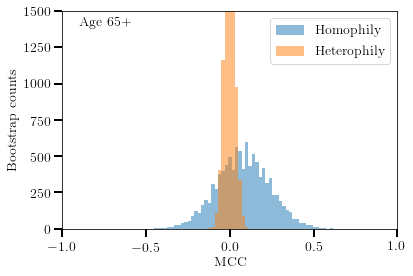

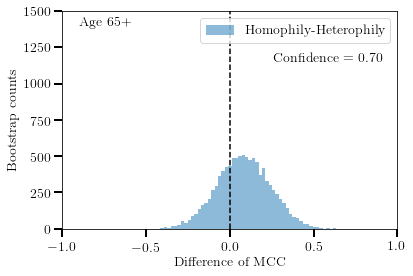

In [10]:
# Age65plus_Heterophily	"[[372 166]
#   [361 160]]"
# Age65plus_Homophily	"[[20 7]
#   [12 6]]"

#Argument key: TP,FN,FP,TN
bootstrap_homo65p = generate_corrcoeff(20,7,12,6)
bootstrap_hetero65p= generate_corrcoeff(372,166,361,160)

result_bias_65p = ttest_ind(bootstrap_homo65p,bootstrap_hetero65p,equal_var=False)
print(result_bias_65p)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homo65p,'Homophily',bootstrap_hetero65p,'Heterophily', 'Age 65+')
plot_difference_of_MCC(bootstrap_homo65p,bootstrap_hetero65p,'Homophily-Heterophily', 'Age 65+')

##Bias per Gender and Race

Ttest_indResult(statistic=158.23373870648788, pvalue=0.0)


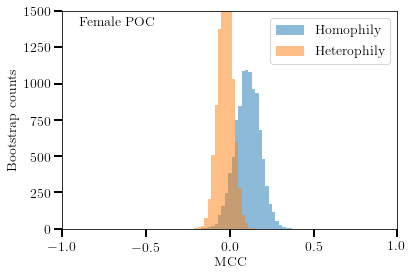

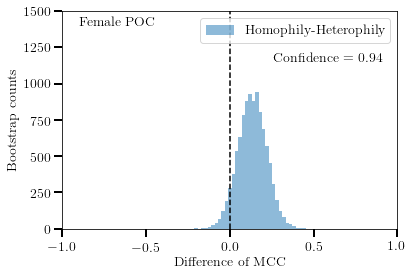

In [11]:
# FemalePOC_Heterophily	"[[162 77]
#   [184 78]]"
# FemalePOC_Homophily	"[[94 20]
#   [64 23]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoFPOC = generate_corrcoeff(94,20,64,23)
bootstrap_heteroFPOC= generate_corrcoeff(162,77,184,78)

result_bias_FPOC = ttest_ind(bootstrap_homoFPOC,bootstrap_heteroFPOC,equal_var=False)
print(result_bias_FPOC)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoFPOC,'Homophily',bootstrap_heteroFPOC,'Heterophily', 'Female POC')
plot_difference_of_MCC(bootstrap_homoFPOC,bootstrap_heteroFPOC,'Homophily-Heterophily', 'Female POC')

Ttest_indResult(statistic=-108.0051882330843, pvalue=0.0)


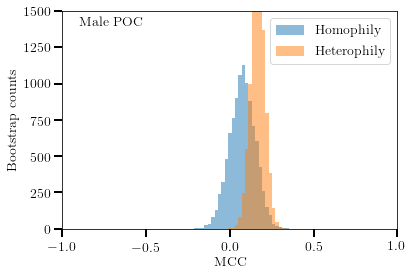

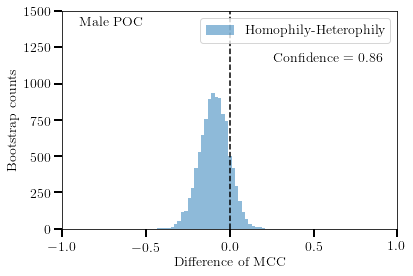

In [12]:
# MalePOC_Heterophily	"[[223 56]
#   [180 97]]"
# MalePOC_Homophily	"[[71 17]
#   [67 23]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoMPOC = generate_corrcoeff(71,17,67,23)
bootstrap_heteroMPOC= generate_corrcoeff(223,56,180,97)

result_bias_MPOC = ttest_ind(bootstrap_homoMPOC,bootstrap_heteroMPOC,equal_var=False)
print(result_bias_MPOC)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoMPOC,'Homophily',bootstrap_heteroMPOC,'Heterophily', 'Male POC')
plot_difference_of_MCC(bootstrap_homoMPOC,bootstrap_heteroMPOC,'Homophily-Heterophily', 'Male POC')

Ttest_indResult(statistic=101.81048427262733, pvalue=0.0)


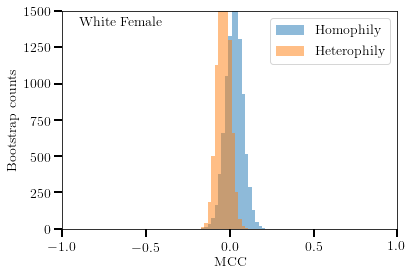

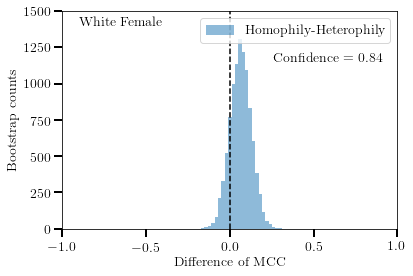

In [13]:
# WhiteFemale_Heterophily	"[[284 115]
#   [263 90]]"
# WhiteFemale_Homophily	"[[132 45]
#   [148 57]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoWF = generate_corrcoeff(132,45,148,57)
bootstrap_heteroWF= generate_corrcoeff(284,115,263,90)

result_bias_WF = ttest_ind(bootstrap_homoWF,bootstrap_heteroWF,equal_var=False)
print(result_bias_WF)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoWF,'Homophily',bootstrap_heteroWF,'Heterophily', 'White Female')
plot_difference_of_MCC(bootstrap_homoWF,bootstrap_heteroWF,'Homophily-Heterophily', 'White Female')

Ttest_indResult(statistic=96.5776572923934, pvalue=0.0)


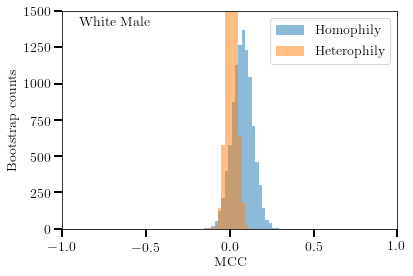

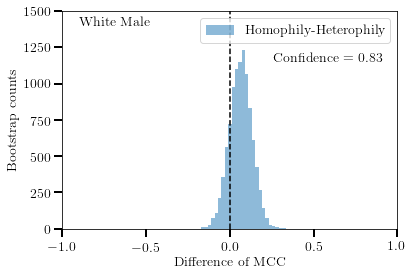

In [14]:
# WhiteMale_Heterophily	"[[466 151]
#   [428 146]]"
# WhiteMale_Homophily	"[[102 32]
#   [ 95 42]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoWM = generate_corrcoeff(102,32,95,42)
bootstrap_heteroWM= generate_corrcoeff(466,151,428,146)

result_bias_WM = ttest_ind(bootstrap_homoWM,bootstrap_heteroWM,equal_var=False)
print(result_bias_WM)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoWM,'Homophily',bootstrap_heteroWM,'Heterophily', 'White Male')
plot_difference_of_MCC(bootstrap_homoWM,bootstrap_heteroWM,'Homophily-Heterophily', 'White Male')

##Bias per Prior Knowledge and Social Media Usage

Ttest_indResult(statistic=154.42370398011823, pvalue=0.0)


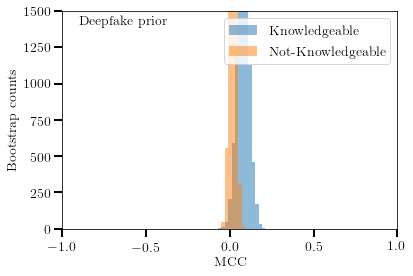

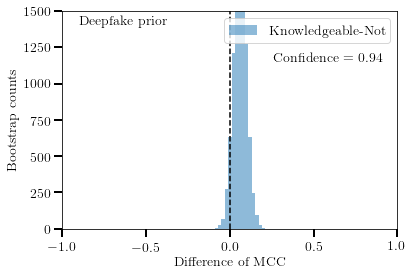

In [15]:
# Knowledgeable_about_deepfakes	"[[315 95]
#   [278 120]]"
# Not_Knowledgeable_about_deepfakes	"[[1169 411]
#   [1104 420]]"

#Argument key: TP,FN,FP,TN
bootstrap_K = generate_corrcoeff(315,95,278,120)
bootstrap_NK= generate_corrcoeff(1169,411,1104,420)

result_bias_K = ttest_ind(bootstrap_K,bootstrap_NK,equal_var=False)
print(result_bias_K)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_K,'Knowledgeable',bootstrap_NK,'Not-Knowledgeable', 'Deepfake prior')
plot_difference_of_MCC(bootstrap_K,bootstrap_NK,'Knowledgeable-Not', 'Deepfake prior')

Ttest_indResult(statistic=97.88507368954721, pvalue=0.0)


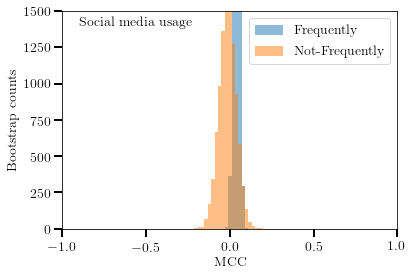

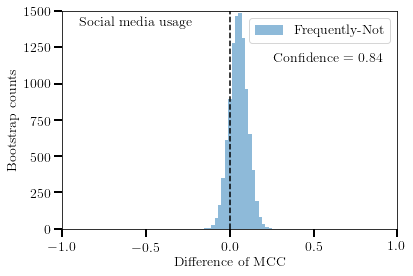

In [16]:
# social_media_frequently	"[[1388 1294]
#   [ 444 496]]"
# social_media_infrequently	"[[141 128]
#   [ 67 58]]"

#Argument key: TP,FN,FP,TN
bootstrap_F = generate_corrcoeff(1388,1294,444,496)
bootstrap_NF= generate_corrcoeff(141,128,67,58)

result_bias_F = ttest_ind(bootstrap_F,bootstrap_NF,equal_var=False)
print(result_bias_F)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_F,'Frequently',bootstrap_NF,'Not-Frequently', 'Social media usage')
plot_difference_of_MCC(bootstrap_F,bootstrap_NF,'Frequently-Not', 'Social media usage')

##By new categories

Ttest_indResult(statistic=29.412291102305037, pvalue=8.162047035392163e-185)


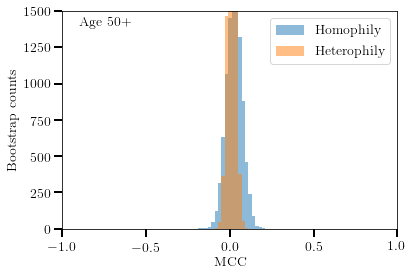

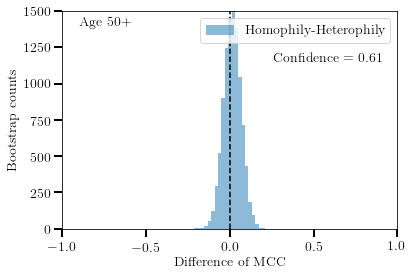

In [17]:
# Age50Plus_Heterophily	"[[677 255]
#   [636 251]]"
# Age50Plus_Homophily	"[[175 63]
#   [153 62]]"

#Argument key: TP,FN,FP,TN
bootstrap_homo50p = generate_corrcoeff(175,63,153,62)
bootstrap_hetero50p = generate_corrcoeff(677,255,636,251)

result_bias_50p = ttest_ind(bootstrap_homo50p,bootstrap_hetero50p,equal_var=False)
print(result_bias_50p)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homo50p,'Homophily',bootstrap_hetero50p,'Heterophily', 'Age 50+')
plot_difference_of_MCC(bootstrap_homo50p,bootstrap_hetero50p,'Homophily-Heterophily', 'Age 50+')

Ttest_indResult(statistic=35.49016967047632, pvalue=1.3409377759155902e-267)


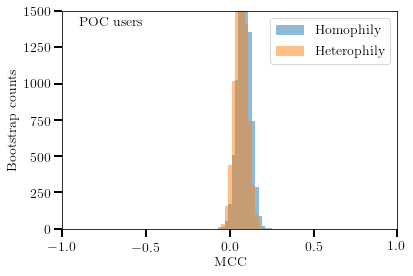

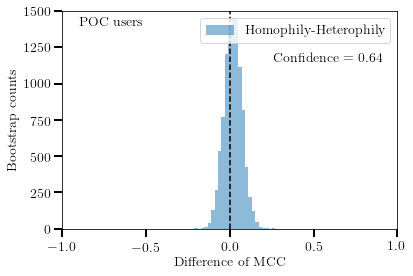

In [18]:
# PersonofColor_Heterophily	"[[244 91]
#   [262 131]]"
# PersonofColor_Homophily	"[[306 79]
#   [233 90]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoPOC = generate_corrcoeff(306,79,233,90)
bootstrap_heteroPOC = generate_corrcoeff(244,91,262,131)

result_bias_POC = ttest_ind(bootstrap_homoPOC,bootstrap_heteroPOC,equal_var=False)
print(result_bias_POC)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoPOC,'Homophily',bootstrap_heteroPOC,'Heterophily', 'POC users')
plot_difference_of_MCC(bootstrap_homoPOC,bootstrap_heteroPOC,'Homophily-Heterophily', 'POC users')

Ttest_indResult(statistic=262.929274776625, pvalue=0.0)


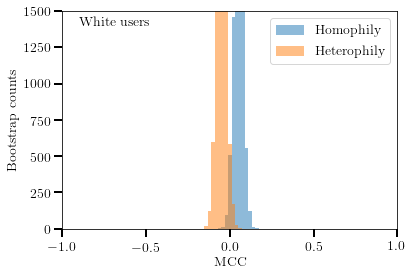

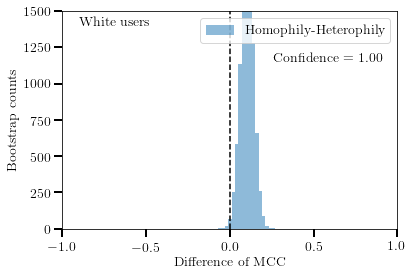

In [28]:
# White_Heterophily	"[[495 184]
#   [421 124]]"
# White_Homophily	"[[489 159]
#   [513 211]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoW = generate_corrcoeff(489,159,513,211)
bootstrap_heteroW = generate_corrcoeff(495,184,421,124)

result_bias_W = ttest_ind(bootstrap_homoW,bootstrap_heteroW,equal_var=False)
print(result_bias_W)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoW,'Homophily',bootstrap_heteroW,'Heterophily', 'White users')
plot_difference_of_MCC(bootstrap_homoW,bootstrap_heteroW,'Homophily-Heterophily', 'White users')

Ttest_indResult(statistic=73.27304133659814, pvalue=0.0)


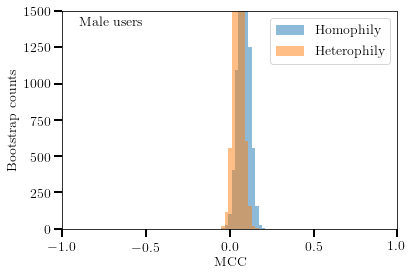

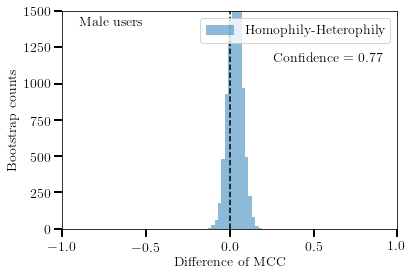

In [20]:
# Male_Heterophily	"[[507 151]
#   [450 170]]"
# Male_Homophily	"[[355 105]
#   [320 138]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoMale = generate_corrcoeff(355,105,320,138)
bootstrap_heteroMale = generate_corrcoeff(507,151,450,170)

result_bias_Male = ttest_ind(bootstrap_homoMale,bootstrap_heteroMale,equal_var=False)
print(result_bias_Male)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoMale,'Homophily',bootstrap_heteroMale,'Heterophily', 'Male users')
plot_difference_of_MCC(bootstrap_homoMale,bootstrap_heteroMale,'Homophily-Heterophily', 'Male users')

Ttest_indResult(statistic=97.50999990369424, pvalue=0.0)


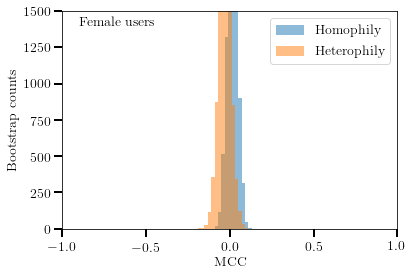

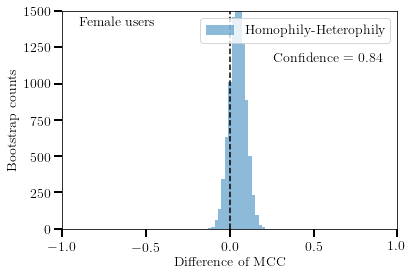

In [21]:
# Female_Heterophily	"[[259 120]
#   [259 105]]"
# Female_Homophily	"[[413 137]
#   [400 143]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoFemale = generate_corrcoeff(413,137,400,143)
bootstrap_heteroFemale = generate_corrcoeff(259,120,259,105)

result_bias_Female = ttest_ind(bootstrap_homoFemale,bootstrap_heteroFemale,equal_var=False)
print(result_bias_Female)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoFemale,'Homophily',bootstrap_heteroFemale,'Heterophily', 'Female users')
plot_difference_of_MCC(bootstrap_homoFemale,bootstrap_heteroFemale,'Homophily-Heterophily', 'Female users')

#comparing different Baselines

Ttest_indResult(statistic=215.3531147189162, pvalue=0.0)


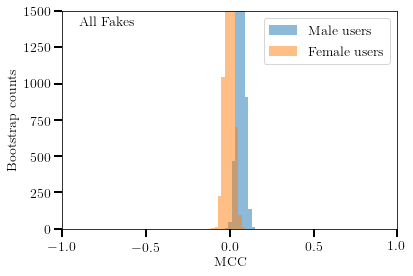

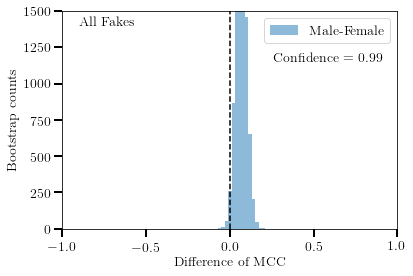

In [22]:
#Argument key: TP,FN,FP,TN
# Female_baseline	"[[672 257]
#   [659 248]]"
# Male_baseline	"[[862 256]
#   [770 308]]"

bootstrap_Male = generate_corrcoeff(862,256,770,308)
bootstrap_Female = generate_corrcoeff(672,257,659,248)

result_bias_Gender = ttest_ind(bootstrap_Male,bootstrap_Female,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_Male,'Male users',bootstrap_Female,'Female users', 'All Videos')
plot_difference_of_MCC(bootstrap_Male,bootstrap_Female,'Male-Female', 'All Videos')

Ttest_indResult(statistic=97.16108165422901, pvalue=0.0)


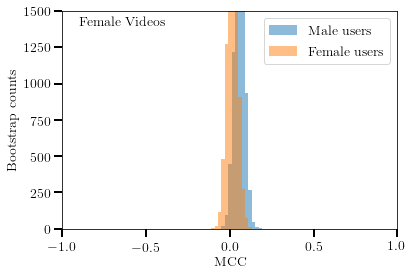

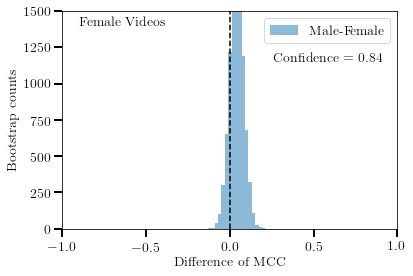

In [23]:
#Argument key: TP,FN,FP,TN
# Male_with_female_Videos	"[[479 429]
#  [129 151]]"
# # Female_with_female_Videos	"[[413 400]
#  [137 143]]"

bootstrap_Male = generate_corrcoeff(479,429,129,151)
bootstrap_Female = generate_corrcoeff(413,400,137,143)

result_bias_Gender = ttest_ind(bootstrap_Male,bootstrap_Female,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_Male,'Male users',bootstrap_Female,'Female users', 'Female Videos')
plot_difference_of_MCC(bootstrap_Male,bootstrap_Female,'Male-Female', 'Female Videos')

Ttest_indResult(statistic=182.61921507511627, pvalue=0.0)


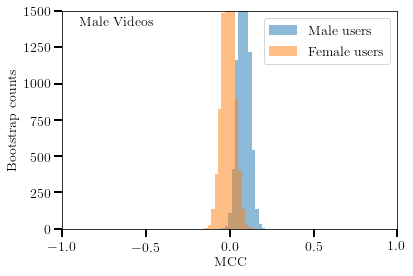

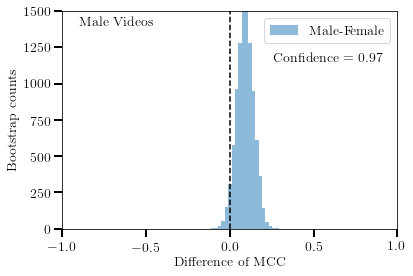

In [31]:
#Argument key: TP,FN,FP,TN
#Male and female participants watching male videos

bootstrap_Male = generate_corrcoeff(355,320,105,138)
bootstrap_Female = generate_corrcoeff(243,246,99,96)

result_bias_Gender = ttest_ind(bootstrap_Male,bootstrap_Female,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_Male,'Male users',bootstrap_Female,'Female users', 'Male Videos')
plot_difference_of_MCC(bootstrap_Male,bootstrap_Female,'Male-Female', 'Male Videos')

Ttest_indResult(statistic=171.50467417167513, pvalue=0.0)


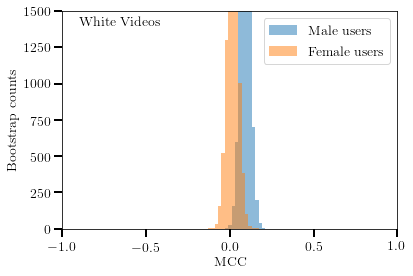

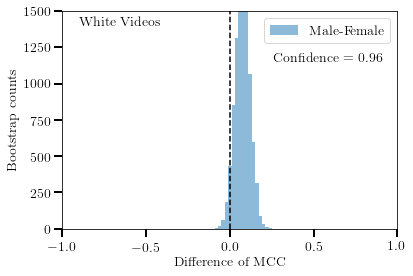

In [32]:
#Male and female viewers of white videos

bootstrap_Male = generate_corrcoeff(409,415,115,179)
bootstrap_Female = generate_corrcoeff(304,344,127,155)

result_bias_Gender = ttest_ind(bootstrap_Male,bootstrap_Female,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_Male,'Male users',bootstrap_Female,'Female users', 'White Videos')
plot_difference_of_MCC(bootstrap_Male,bootstrap_Female,'Male-Female', 'White Videos')

Ttest_indResult(statistic=179.93580014965187, pvalue=0.0)


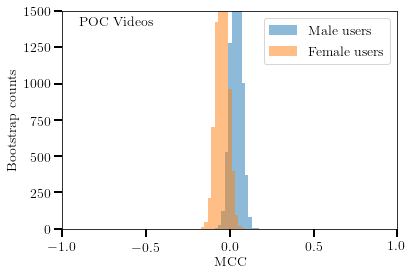

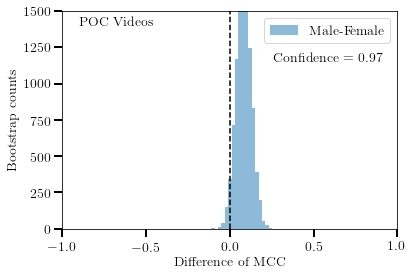

In [33]:
#Male and female viewers of POC videos

bootstrap_Male = generate_corrcoeff(427,334,127,118)
bootstrap_Female = generate_corrcoeff(341,298,121,85)

result_bias_Gender = ttest_ind(bootstrap_Male,bootstrap_Female,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_Male,'Male users',bootstrap_Female,'Female users', 'POC Videos')
plot_difference_of_MCC(bootstrap_Male,bootstrap_Female,'Male-Female', 'POC Videos')

Ttest_indResult(statistic=229.82158782209208, pvalue=0.0)


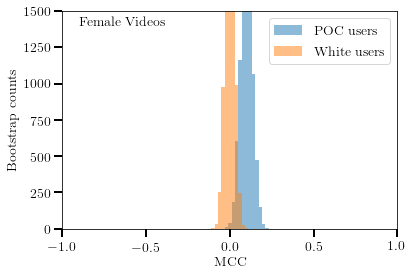

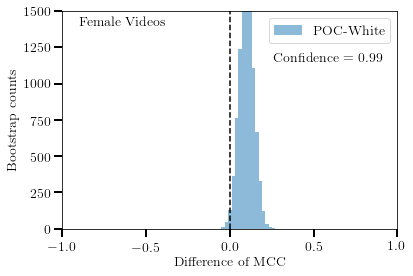

In [34]:
#White and POC viewers of female videos

bootstrap_POC = generate_corrcoeff(330,289,92,127)
bootstrap_White = generate_corrcoeff(562,540,174,167)

result_bias_Gender = ttest_ind(bootstrap_POC,bootstrap_White,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_POC,'POC users',bootstrap_White,'White users', 'Female Videos')
plot_difference_of_MCC(bootstrap_POC,bootstrap_White,'POC-White', 'Female Videos')

Ttest_indResult(statistic=8.391870350717486, pvalue=5.1270293120176456e-17)


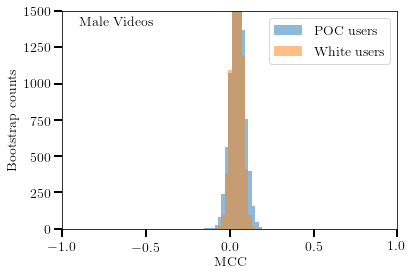

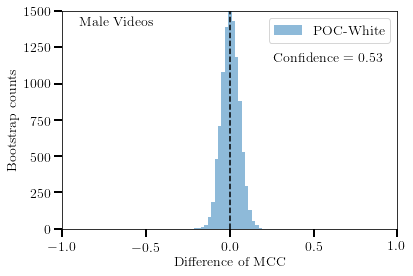

In [35]:
#White and POC viewers of male videos

bootstrap_POC = generate_corrcoeff(204,197,71,84)
bootstrap_White = generate_corrcoeff(394,369,133,150)

result_bias_Gender = ttest_ind(bootstrap_POC,bootstrap_White,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_POC,'POC users',bootstrap_White,'White users', 'Male Videos')
plot_difference_of_MCC(bootstrap_POC,bootstrap_White,'POC-White', 'Male Videos')

Ttest_indResult(statistic=119.78599860071557, pvalue=0.0)


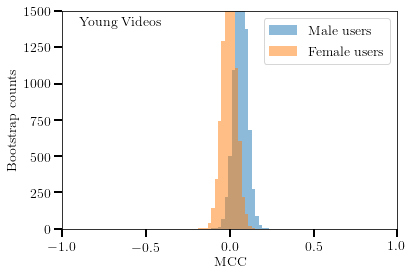

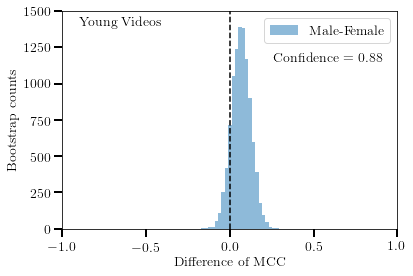

In [38]:
#Male and female viewers watching young videos

bootstrap_Male = generate_corrcoeff(261,249,75,96)
bootstrap_Female = generate_corrcoeff(201,227,72,80)

result_bias_Gender = ttest_ind(bootstrap_Male,bootstrap_Female,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_Male,'Male users',bootstrap_Female,'Female users', 'Young Videos')
plot_difference_of_MCC(bootstrap_Male,bootstrap_Female,'Male-Female', 'Young Videos')

In [ ]:
#Male and female viewers watching middle-aged videos

bootstrap_Male = generate_corrcoeff(442,390,130,154)
bootstrap_Female = generate_corrcoeff(340,306,129,112)

result_bias_Gender = ttest_ind(bootstrap_Male,bootstrap_Female,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_Male,'Male users',bootstrap_Female,'Female users', 'Middle-aged Videos')
plot_difference_of_MCC(bootstrap_Male,bootstrap_Female,'Male-Female', 'Middle-aged Videos')

Ttest_indResult(statistic=55.80526631577314, pvalue=0.0)


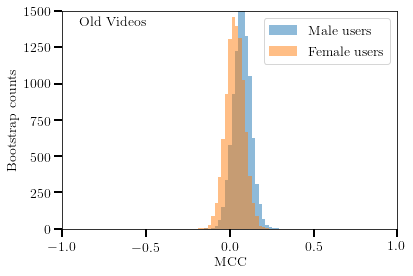

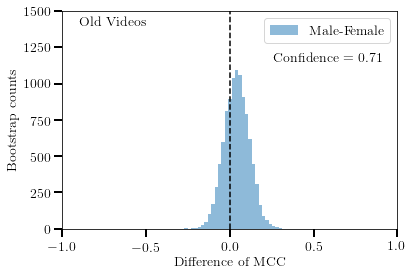

In [40]:
#Male and female viewers watching old videos

bootstrap_Male = generate_corrcoeff(156,126,48,54)
bootstrap_Female = generate_corrcoeff(130,124,51,56)

result_bias_Gender = ttest_ind(bootstrap_Male,bootstrap_Female,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_Male,'Male users',bootstrap_Female,'Female users', 'Old Videos')
plot_difference_of_MCC(bootstrap_Male,bootstrap_Female,'Male-Female', 'Old Videos')

Ttest_indResult(statistic=135.43203356583754, pvalue=0.0)


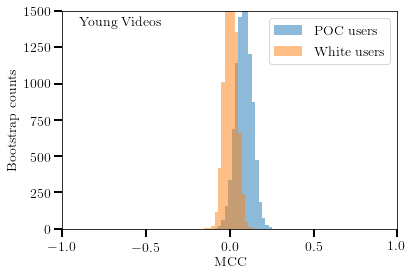

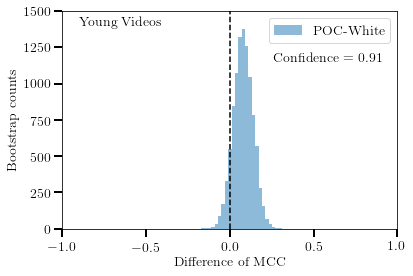

In [41]:
#White and POC viewers of young videos

bootstrap_POC = generate_corrcoeff(175,148,55,68)
bootstrap_White = generate_corrcoeff(287,328,92,108)

result_bias_Gender = ttest_ind(bootstrap_POC,bootstrap_White,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_POC,'POC users',bootstrap_White,'White users', 'Young Videos')
plot_difference_of_MCC(bootstrap_POC,bootstrap_White,'POC-White', 'Young Videos')

Ttest_indResult(statistic=91.26087784218855, pvalue=0.0)


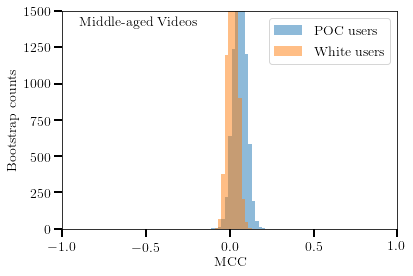

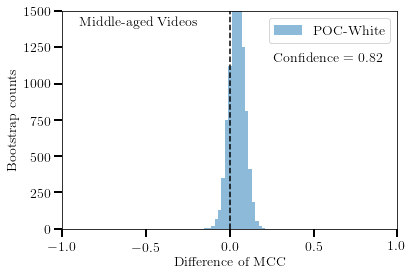

In [42]:
#White and POC viewers of Middle-aged videos

bootstrap_POC = generate_corrcoeff(273,256,81,100)
bootstrap_White = generate_corrcoeff(509,440,178,166)

result_bias_Gender = ttest_ind(bootstrap_POC,bootstrap_White,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_POC,'POC users',bootstrap_White,'White users', 'Middle-aged Videos')
plot_difference_of_MCC(bootstrap_POC,bootstrap_White,'POC-White', 'Middle-aged Videos')

Ttest_indResult(statistic=173.10406322395409, pvalue=0.0)


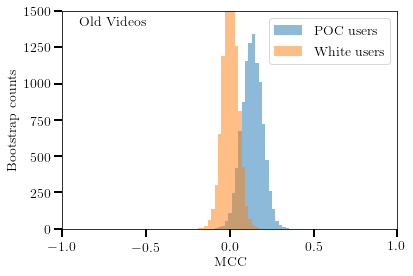

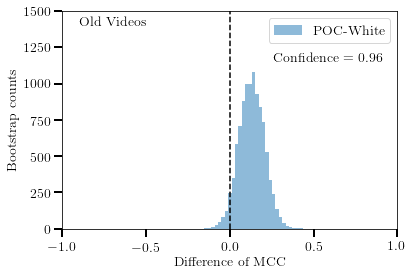

In [43]:
#White and POC viewers of Old videos

bootstrap_POC = generate_corrcoeff(99,90,31,51)
bootstrap_White = generate_corrcoeff(187,160,68,59)

result_bias_Gender = ttest_ind(bootstrap_POC,bootstrap_White,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_POC,'POC users',bootstrap_White,'White users', 'Old Videos')
plot_difference_of_MCC(bootstrap_POC,bootstrap_White,'POC-White', 'Old Videos')

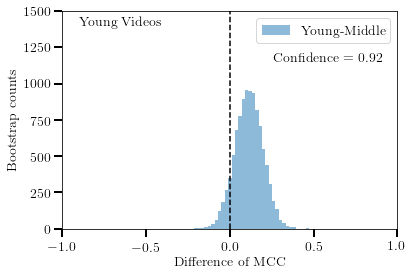

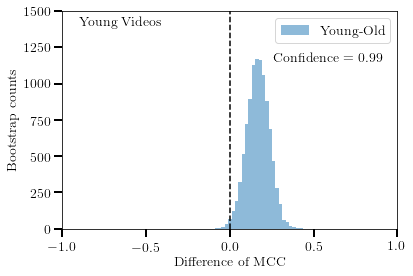

In [45]:
#different age viewers of young videos

bootstrap_Young = generate_corrcoeff(117,107,28,51)
bootstrap_Middle = generate_corrcoeff(106,99,28,31)
bootstrap_Old = generate_corrcoeff(239,270,91,94)

#Argument key:  array and label, demographic array
plot_difference_of_MCC(bootstrap_Young,bootstrap_Middle,'Young-Middle', 'Young Videos')
plot_difference_of_MCC(bootstrap_Young,bootstrap_Old,'Young-Old', 'Young Videos')

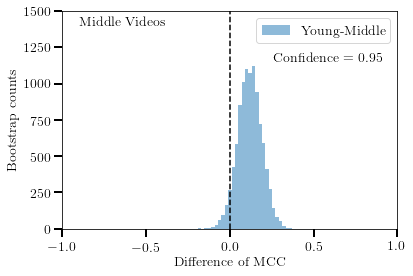

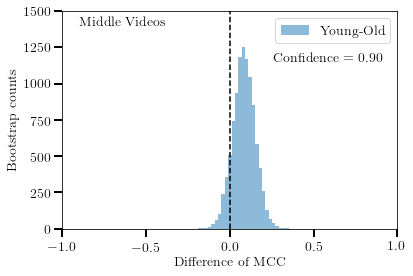

In [46]:
#different age viewers of middle-aged videos

bootstrap_Young = generate_corrcoeff(112,90,34,46)
bootstrap_Middle = generate_corrcoeff(235,243,64,65)
bootstrap_Old = generate_corrcoeff(435,363,161,155)

#Argument key:  array and label, demographic array
plot_difference_of_MCC(bootstrap_Young,bootstrap_Middle,'Young-Middle', 'Middle Videos')
plot_difference_of_MCC(bootstrap_Young,bootstrap_Old,'Young-Old', 'Middle Videos')

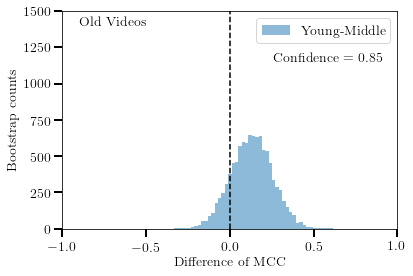

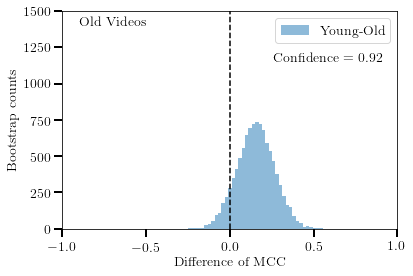

In [47]:
#different age viewers of Old videos

bootstrap_Young = generate_corrcoeff(40,27,12,18)
bootstrap_Middle = generate_corrcoeff(71,70,24,30)
bootstrap_Old = generate_corrcoeff(175,153,63,62)

#Argument key:  array and label, demographic array
plot_difference_of_MCC(bootstrap_Young,bootstrap_Middle,'Young-Middle', 'Old Videos')
plot_difference_of_MCC(bootstrap_Young,bootstrap_Old,'Young-Old', 'Old Videos')

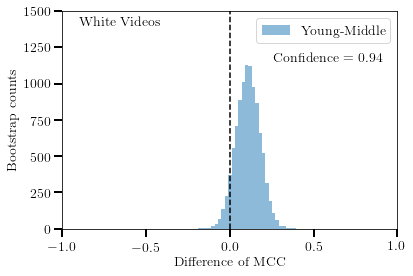

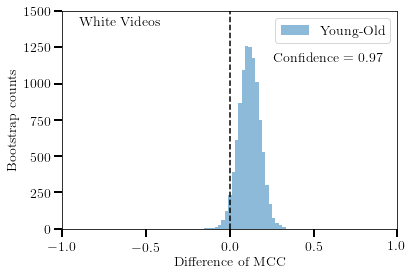

In [48]:
#different age viewers of White videos

bootstrap_Young = generate_corrcoeff(106,102,36,68)
bootstrap_Middle = generate_corrcoeff(174,199,50,71)
bootstrap_Old = generate_corrcoeff(433,458,156,195)

#Argument key:  array and label, demographic array
plot_difference_of_MCC(bootstrap_Young,bootstrap_Middle,'Young-Middle', 'White Videos')
plot_difference_of_MCC(bootstrap_Young,bootstrap_Old,'Young-Old', 'White Videos')

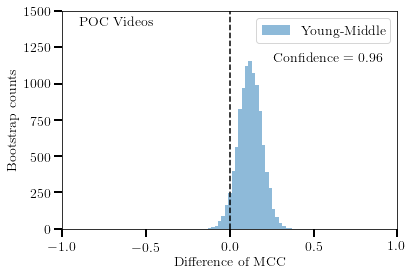

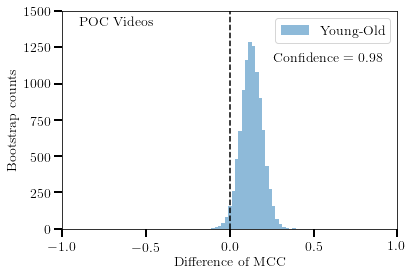

In [49]:
#different age viewers of POC videos

bootstrap_Young = generate_corrcoeff(148,113,32,41)
bootstrap_Middle = generate_corrcoeff(227,203,63,52)
bootstrap_Old = generate_corrcoeff(393,316,153,110)

#Argument key:  array and label, demographic array
plot_difference_of_MCC(bootstrap_Young,bootstrap_Middle,'Young-Middle', 'POC Videos')
plot_difference_of_MCC(bootstrap_Young,bootstrap_Old,'Young-Old', 'POC Videos')

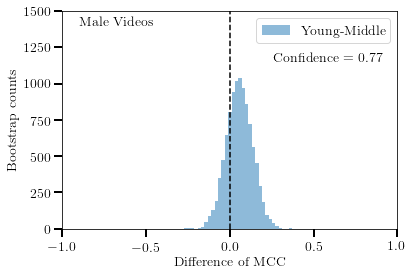

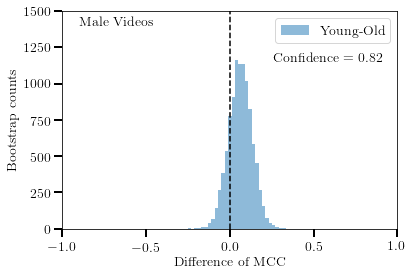

In [50]:
#different age viewers of Male videos

bootstrap_Young = generate_corrcoeff(104,89,33,43)
bootstrap_Middle = generate_corrcoeff(161,166,48,59)
bootstrap_Old = generate_corrcoeff(333,311,123,132)

#Argument key:  array and label, demographic array
plot_difference_of_MCC(bootstrap_Young,bootstrap_Middle,'Young-Middle', 'Male Videos')
plot_difference_of_MCC(bootstrap_Young,bootstrap_Old,'Young-Old', 'Male Videos')

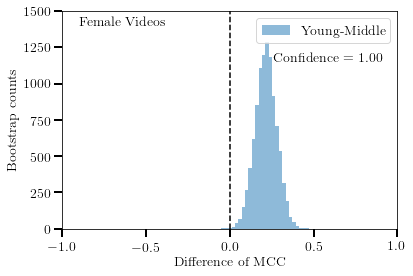

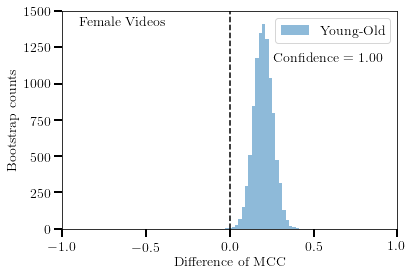

In [51]:
#different age viewers of Female videos

bootstrap_Young = generate_corrcoeff(150,121,31,67)
bootstrap_Middle = generate_corrcoeff(239,244,63,62)
bootstrap_Old = generate_corrcoeff(503,464,172,165)

#Argument key:  array and label, demographic array
plot_difference_of_MCC(bootstrap_Young,bootstrap_Middle,'Young-Middle', 'Female Videos')
plot_difference_of_MCC(bootstrap_Young,bootstrap_Old,'Young-Old', 'Female Videos')

Ttest_indResult(statistic=-229.37076141617095, pvalue=0.0)


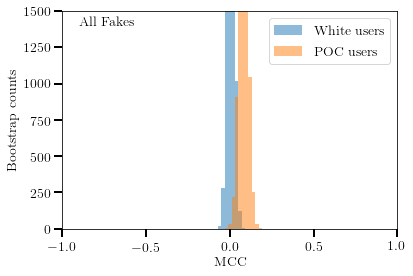

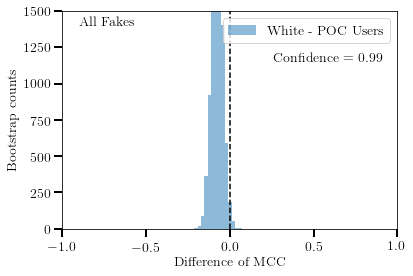

In [24]:
#Argument key: TP,FN,FP,TN
# PersonofColor_baseline	"[[550 170]
#   [495 221]]"
# White_baseline	"[[984 343]
#   [934 335]]"

bootstrap_White = generate_corrcoeff(984,343,934,335)
bootstrap_POC = generate_corrcoeff(550,170,495,221)

result_bias_race = ttest_ind(bootstrap_White,bootstrap_POC,equal_var=False)
print(result_bias_race)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_White,'White users',bootstrap_POC,'POC users', 'All Videos')
plot_difference_of_MCC(bootstrap_White,bootstrap_POC,'White - POC Users', 'All Videos')

Ttest_indResult(statistic=-291.9775935401439, pvalue=0.0)


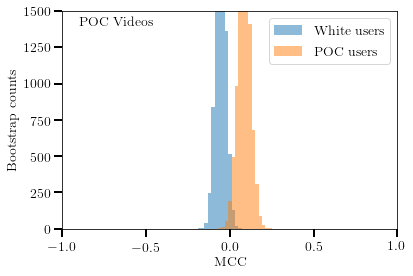

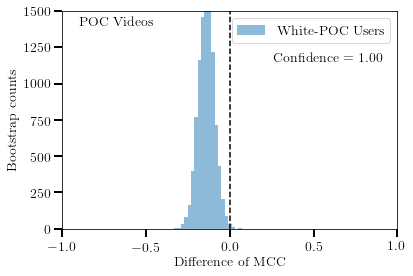

In [25]:
#Argument key: TP,FN,FP,TN
# # PersonofColor_with_POC_video "[[306 233]
#  [ 79  90]]"
# # White_with_POC_video "[[462 399]
#  [169 113]]"


bootstrap_White = generate_corrcoeff(462,399,169,113)
bootstrap_POC = generate_corrcoeff(306,233,79,90)

result_bias_race = ttest_ind(bootstrap_White,bootstrap_POC,equal_var=False)
print(result_bias_race)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_White,'White users',bootstrap_POC,'POC users', 'POC Videos')
plot_difference_of_MCC(bootstrap_White,bootstrap_POC,'White-POC Users', 'POC Videos')

Ttest_indResult(statistic=-36.43782711619763, pvalue=1.8338441891162018e-280)


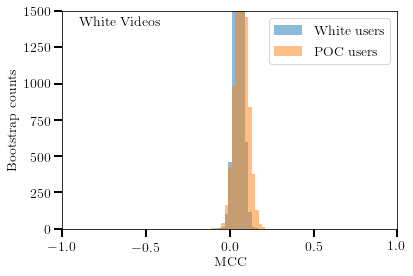

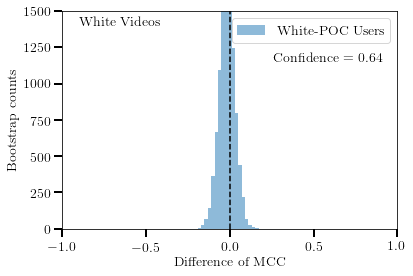

In [26]:
#Argument key: TP,FN,FP,TN
# PersonofColor_with_White_video "[[224 246]
#  [ 83 123]]"
# # White_with_White_video "[[489 513]
#  [159 211]]"


bootstrap_White = generate_corrcoeff(489,513,159,211)
bootstrap_POC = generate_corrcoeff(224,246,83,123)

result_bias_race = ttest_ind(bootstrap_White,bootstrap_POC,equal_var=False)
print(result_bias_race)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_White,'White users',bootstrap_POC,'POC users', 'White Videos')
plot_difference_of_MCC(bootstrap_White,bootstrap_POC,'White-POC Users', 'White Videos')

Ttest_indResult(statistic=274.113680618898, pvalue=0.0)


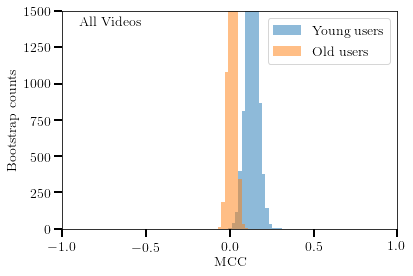

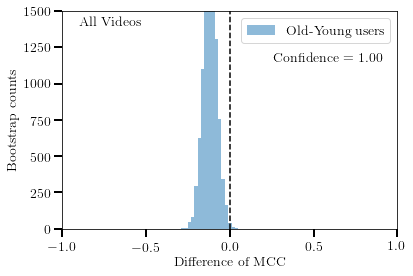

In [27]:
#Argument key: TP,FN,FP,TN
# Age1829_Baseline	"[[269 77]
#   [224 116]]"
# Age50Plus_baseline	"[[852 318]
#   [789 313]]"


bootstrap_Young = generate_corrcoeff(269,77,224,116)
bootstrap_Old = generate_corrcoeff(852,318,789,313)

result_bias_age = ttest_ind(bootstrap_Young,bootstrap_Old,equal_var=False)
print(result_bias_age)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_Young,'Young users',bootstrap_Old,'Old users', 'All Videos')
plot_difference_of_MCC(bootstrap_Old,bootstrap_Young,'Old-Young users', 'All Videos')

#